In [ ]:
!pip install pandas numpy scikit-learn scipy matplotlib plotly geopandas nltk


In [1]:
#imporing necesary packages 
import pandas as pd

In [6]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [28]:
#data set preprocessing, we have to preprocess and clean the dataset so that we can implement our algorithm and get accurate results
#deleting irrelevant columns such as id,created_at, source,orginal text,fav count, rt count, orginal author(unique for twts), usermentions 

df =df.drop(columns=['id', 'created_at','source','original_text','favorite_count','retweet_count','original_author','hashtags','user_mentions'])
df.head()

,lang,place,clean_tweet,compound,neg,neu,pos,sentiment
0,en,Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,en,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,en,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,en,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,en,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [29]:
#we can remove 'lang' column , if all the tweets are in en
df['lang'].nunique()

1

In [30]:
#all the tweets are in english , so we can remove that column 
df = df.drop(columns=['lang'])
df.head()

,place,clean_tweet,compound,neg,neu,pos,sentiment
0,Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [31]:
df.head(15)

,place,clean_tweet,compound,neg,neu,pos,sentiment
0,Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.000,0.452,0.548,pos
1,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.000,0.602,0.398,pos
2,NaN,polic offici base namahadi polic station busi ...,0.2732,0.000,0.851,0.149,pos
3,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.000,1.000,0.000,neu
4,NaN,condol famili surviv,0.0000,0.000,1.000,0.000,neu
5,"British Columbia, Canada",receiv text year old son work covid19 patient ...,0.0000,0.000,1.000,0.000,neu
6,"London, England",taiwan vice presid chen chien jen countri figh...,-0.3818,0.245,0.755,0.000,neg
7,JPO Aesthetics,break new york woman symptom die last week pre...,-0.5994,0.262,0.738,0.000,neg
8,"Ottawa, Ontario",horribl tragedi nova scotia today famili get c...,0.0000,0.000,1.000,0.000,neu
9,NaN,covid19 cure sooner later cure ghose viru,0.0000,0.000,1.000,0.000,neu


In [ ]:
# we dont have to preprocess the tweet's content cause the tweet is already cleaned.

In [15]:
#we can observe, the compound value is the deciding point for sentiment 
# if the compound == 0, sentiment = neutral , elif compound > 0, sentiment is pos
#if compund is <0, sentiment = negetive 


In [16]:
#lets consider Naive bayes algorithm for the classification of tweets, its is a great algo taking its effectiveness in text classification

In [32]:
df['clean_tweet'].nunique()


137698

In [33]:
print(len(df))

143903


In [19]:
#there are obv some duplicate tweets , we should remove them to decrease redundancy

In [34]:
df = df.drop_duplicates(subset=['clean_tweet'])
df.head()

,place,clean_tweet,compound,neg,neu,pos,sentiment
0,Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [35]:
print(len(df))

137699


In [ ]:
#now that the duplicates are removed, lets consider NB model
#we can combine both 'clean_tweet' and 'compound'(which is taken from a tool like VADER, which is useful and gives us insight about sentiment)



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

In [41]:
df['clean_tweet'] = df['clean_tweet'].fillna('').apply(str)
df['clean_tweet'] = df['clean_tweet'].fillna('')
df['compound'] = df['compound'].fillna(0) 

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['compound'] = scaler.fit_transform(df[['compound']])
#as we have -ve values , the NB model cant handle those , so we normalize them

In [46]:
#we need tf-idf values of cleantweets and compound and we have to combine them 
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df['clean_tweet'])
X_compound = df[['compound']].values
X_combined = hstack((X_text, X_compound))
y = df['sentiment']


In [47]:
#spliiting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.25, random_state=42)


In [48]:
#training NB model for classification 

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [51]:
#now we predict our test data
y_pred = model.predict(X_test)


In [52]:
# we evaluate our model with a metric called accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8693391430646332


In [53]:
# analysing model with a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.92      0.76      0.84      9615
         neu       0.89      0.92      0.91     13568
         pos       0.81      0.90      0.85     11242

    accuracy                           0.87     34425
   macro avg       0.88      0.86      0.86     34425
weighted avg       0.87      0.87      0.87     34425



In [54]:
#some visualization techniques, to analyse our model well

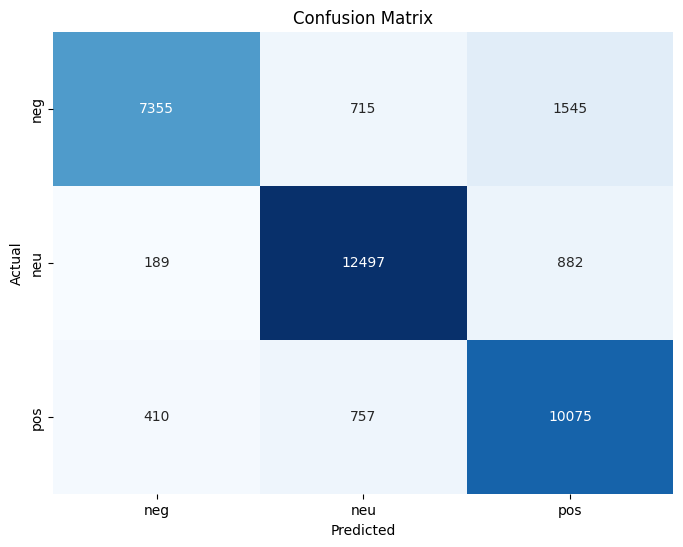

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\SAI AMRUTHA\AppData\Local\Temp\ipykernel_2700\874277516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


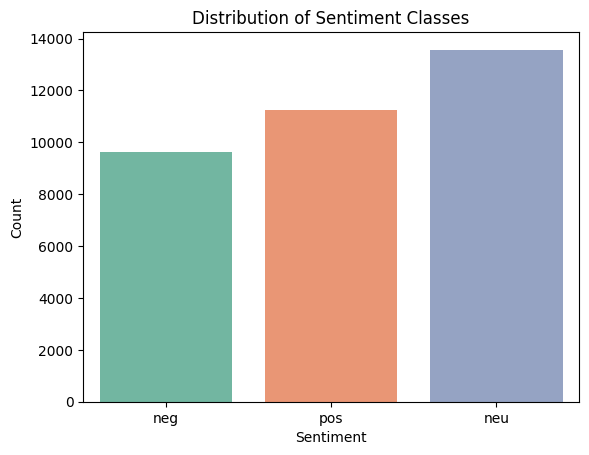

In [58]:

sns.countplot(x=y_test, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()
